In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import StandardScaler

In [93]:
df = yf.Ticker('XOM').history(period="max", interval='1wk')
# df['Close_dif'] = df['Close'].diff()
df = df.dropna().iloc[:, :4]
for i in df.columns: df = df[df[i] != 0]

In [4]:
df = pd.read_csv('../data/premodel/XOM/1-set/time_ahead_1/data_scaler/df.csv')
df = df.set_index('Date')
target = pd.read_csv('../data/premodel/XOM/1-set/time_ahead_1/data_scaler/target.csv')
df['target_1'] = target['Close_Ema_5_diff'].values
df = df.iloc[:-1, :]
target = pd.read_csv('../data/premodel/XOM/1-set/time_ahead_2/data_scaler/target.csv')
df['target_2'] = target['Close_Ema_5_diff'].values
df = df.iloc[:-1, :]
target = pd.read_csv('../data/premodel/XOM/1-set/time_ahead_3/data_scaler/target.csv')
df['target_3'] = target['Close_Ema_5_diff'].values
df = df.iloc[:-1, :]
target = pd.read_csv('../data/premodel/XOM/1-set/time_ahead_4/data_scaler/target.csv')
df['target_4'] = target['Close_Ema_5_diff'].values
df.head(3)

,Open,Close,High,Low,Volume,Close_Ema_5,High_Ema_5,Low_Ema_5,Open_Ema_5,Close_Ema_9,...,momentum_ppo_diff,momentum_ppo_signal_diff,momentum_ppo_hist_diff,others_dr_diff,others_dlr_diff,others_cr_diff,target_1,target_2,target_3,target_4
Date,,,,,,,,,,,,,,,,,,,,,
1970-05-26,-0.907448,-0.907489,-0.908267,-0.906586,-0.855470,-0.907347,-0.908112,-0.906446,-0.907258,-0.907199,...,0.909911,0.660788,0.807966,1.229307,1.347530,-0.008959,-0.017012,-0.009411,-0.006769,-0.011675
1970-05-27,-0.907433,-0.907262,-0.908117,-0.906556,-0.834368,-0.907295,-0.908079,-0.906457,-0.907291,-0.907175,...,0.987201,1.085886,0.720278,1.466207,1.557218,0.001668,-0.009411,-0.006769,-0.011675,-0.015551
1970-05-28,-0.907160,-0.907020,-0.907907,-0.906282,-0.671671,-0.907179,-0.907988,-0.906374,-0.907223,-0.907107,...,2.878268,2.493335,2.385013,0.042622,0.047803,0.002427,-0.006769,-0.011675,-0.015551,-0.018136


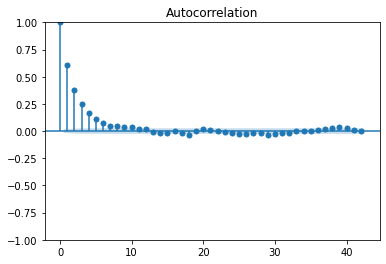

count    12993.000000
mean         0.000648
std          1.003131
min        -12.664792
25%         -0.092077
50%         -0.019866
75%          0.142560
max          7.884919
Name: Close_Ema_5_diff, dtype: float64


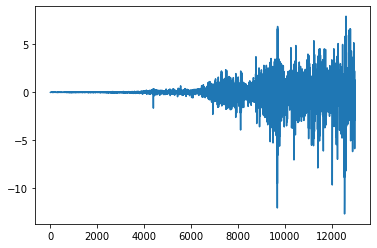

In [21]:
plot_acf(df['Close_Ema_5_diff'])
plt.show()
# print(df.corr()['Close_Ema_5_diff'].sort_values())
print(df['Close_Ema_5_diff'].describe())
# df['Close_Ema_5_diff'].hist()
plt.plot(df['Close_Ema_5_diff'].values)

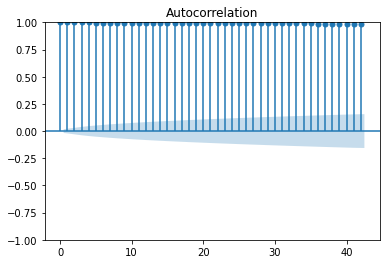

count    12993.000000
mean         0.006486
std          1.000455
min         -0.907489
25%         -0.874505
50%         -0.527235
75%          0.897540
max          2.174612
Name: Close, dtype: float64

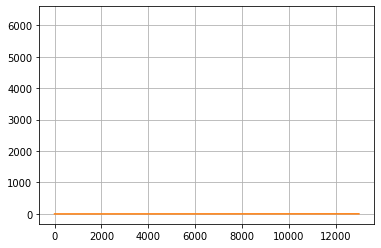

In [24]:
plot_acf(df['Close'])
plt.show()
df.corr()['Close'].sort_values()
df['Close'].hist()
plt.plot(df['Close'].values)
df['Close'].describe()

In [6]:
df.loc[:, ['Close_Ema_5_diff', 'target_1', 'target_2', 'target_3', 'target_4']].corr()['Close_Ema_5_diff']

Close_Ema_5_diff    1.000000
target_1            0.605201
target_2            0.376392
target_3            0.248491
target_4            0.161804
Name: Close_Ema_5_diff, dtype: float64

In [8]:
# plt.figure(figsize=(8, 6), dpi=80)
# sns.lineplot(data=df.iloc[1200:, :], y='Close_diff', x='Date')
# sns.lineplot(data=df.iloc[1200:, :], y='Close', x='Date')